In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/Users/daniellelouie/Documents/Berkeley/2024-2025/stat-198/HW 4/StackOverflow Survey 2024 for IDSUCSB Spring 2025 - Data.csv')
df

,JobSatisfactionScore,DeveloperType,AgeGroup,IsEmployed,IsStudent,IsStudentOrEmployed,IsRemote,HighestDegree,YearsCode,RoleType,...,UsesAI,SatisfactionFromDrivingStrategy,SatisfactionFromOpenSource,SatisfactionFromSecurity,SatisfactionFromDevExperience,SatisfactionFromLearning,SatisfactionFromBuilding,SatisfactionFromBeingSourceOfInfo,SatisfactionFromHardware,SatisfactionFromSoftwareMonitoringTools
0,0.8,Prior Developer,35,1.0,0,1,1.0,BS,20,Project manager,...,1,0.5,0.0,0.0,0.25,0.1,0.0,0.15,0.0,0.0
1,0.8,Current Developer,35,1.0,0,1,0.5,BS,20,"Developer, back-end",...,0,0.0,0.0,0.3,0.30,0.0,0.0,0.20,0.1,0.1
2,0.5,Current Developer,45,1.0,0,1,0.5,No College Degree,31,"Developer, full-stack",...,0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
3,1.0,Current Developer,25,1.0,0,1,0.5,No College Degree,12,"Developer, full-stack",...,1,0.1,0.0,0.1,0.60,0.1,0.1,0.00,0.0,0.0
4,0.6,Part Developer,25,1.0,0,1,0.5,MS,5,Other,...,1,0.9,1.0,1.0,1.00,0.9,0.9,1.00,0.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29121,0.8,Current Developer,45,1.0,0,1,0.5,No College Degree,18,"Developer, embedded applications or devices",...,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
29122,0.5,Current Developer,25,1.0,0,1,0.5,BS,13,Engineering manager,...,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
29123,0.8,Current Developer,Unknown,1.0,0,1,0.0,No College Degree,3,"Developer, mobile",...,1,0.2,0.1,0.3,0.60,0.7,0.3,0.10,0.1,0.4
29124,0.8,Current Developer,25,1.0,0,1,0.5,No College Degree,9,"Developer, full-stack",...,0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0


In [7]:
# butterfly plot
# x-axis = Job Satisfaction
# different developer type per row - or education
# two categories to compare, Uses AI vs Not

In [ ]:
pivot_df = df.pivot_table(index='DeveloperType', columns='UsesAI', values='JobSatisfactionScore', aggfunc='mean')
pivot_df

UsesAI,0,1
DeveloperType,,
Current Developer,0.691461,0.700530
Hobby Developer,0.602326,0.604688
Learning Developer,0.537255,0.528736
Part Developer,0.663384,0.661842
Prior Developer,0.648485,0.719512


/var/folders/jz/tmg5mxd9661fqkvv1hfktc6w0000gn/T/ipykernel_12369/1527966060.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{abs(tick):.1f}' for tick in ax.get_xticks()])
/var/folders/jz/tmg5mxd9661fqkvv1hfktc6w0000gn/T/ipykernel_12369/1527966060.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(bar1.get_width() / 2, bar1.get_y() + bar1.get_height() / 2, f'{x1[i]:.5f}', ha='center', va='center', color='black')
/var/folders/jz/tmg5mxd9661fqkvv1hfktc6w0000gn/T/ipykernel_12369/1527966060.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a 

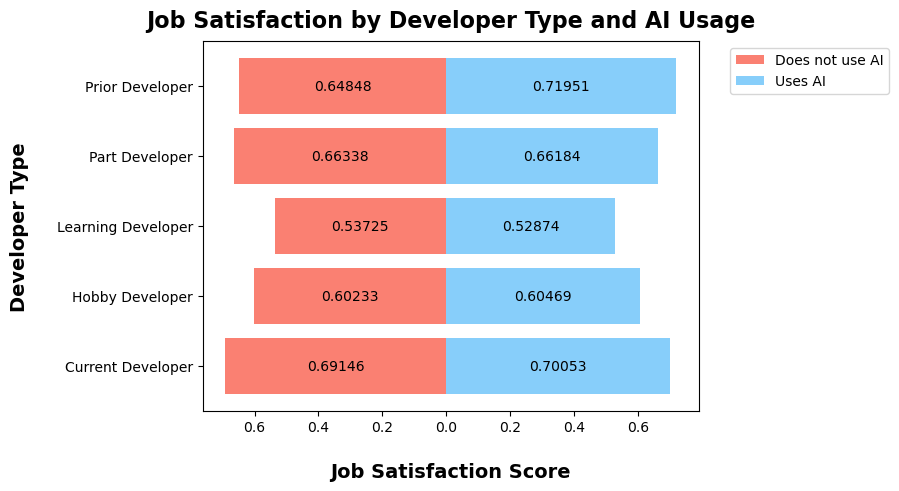

In [57]:
fig, ax = plt.subplots()
(l1, x1), (l2, x2) = pivot_df.items()

y = range(len(x1))
labels = pivot_df.index.tolist()
plt.yticks(y, labels)

bars1 = plt.barh(y=y,width=-x1, color='salmon', label='Does not use AI')
bars2 = plt.barh(y=y,width=x2, color='lightskyblue', label='Uses AI')

# Makes sure that both sides are positive values
ax.set_xticklabels([f'{abs(tick):.1f}' for tick in ax.get_xticks()])

# Add developer type labels between the bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    ax.text(bar1.get_width() / 2, bar1.get_y() + bar1.get_height() / 2, f'{x1[i]:.5f}', ha='center', va='center', color='black')
    ax.text(bar2.get_width() / 2, bar2.get_y() + bar2.get_height() / 2, f'{x2[i]:.5f}', ha='center', va='center', color='black')

plt.title('Job Satisfaction by Developer Type and AI Usage', fontsize=16, fontweight='bold', pad=10)
ax.set_ylabel('Developer Type', fontsize=14, fontweight='bold', labelpad=20)
ax.set_xlabel('Job Satisfaction Score', fontsize=14, fontweight='bold', labelpad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()